In [3]:
import pyDOE2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# factors and levels

LL2 = [0, 10, 20]
LL3 = [0, 10, 20]
P3 = [30, 40, 50]
S2 = [0.25, 0.5, 0.75]

f1 = len(LL2)
f2 = len(LL3)
f3 = len(P3)
f4 = len(S2)

# levels
levels = [f1,f2,f3,f4]


In [15]:
# full factorial design
full_levels=1

for f in levels:
    full_levels = full_levels * f
    
print(full_levels)

81


In [16]:
# reduction factor


target_number_of_exps = 20
reduction = int(full_levels/target_number_of_exps)
reduction

4

In [17]:
# gsd design

pyDOE2.gsd(levels = levels, reduction = reduction).shape

(20, 4)

In [18]:
# DOE plan

doe = pd.DataFrame(pyDOE2.gsd(levels, reduction), columns = ['LL2', 'LL3', 'P3', 'S2'])
doe


,LL2,LL3,P3,S2
0,0,0,0,0
1,0,0,1,1
2,0,0,2,2
3,0,1,0,1
4,0,1,1,2
5,0,2,0,2
6,0,2,2,0
7,1,0,0,1
8,1,0,1,2
9,1,1,0,2


In [20]:
# map levels to values

mappings = {
    'LL2': {0: 0,    1: 10,    2: 20},
    'LL3': {0: 0,    1: 10,    2: 20},
    'P3':  {0: 30,   1: 40,    2: 50},
    'S2':  {0: 0.25, 1: 0.5,   2: 0.75}
    }

for column, mapping in mappings.items():
    doe[column] = doe[column].map(mapping)
    
doe

,LL2,LL3,P3,S2
0,0,0,30,0.25
1,0,0,40,0.50
2,0,0,50,0.75
3,0,10,30,0.50
4,0,10,40,0.75
5,0,20,30,0.75
6,0,20,50,0.25
7,10,0,30,0.50
8,10,0,40,0.75
9,10,10,30,0.75


In [21]:
# calculate the drug input
doe['Drug'] = 100 - doe['LL2'] - doe['LL3'] - doe['P3']

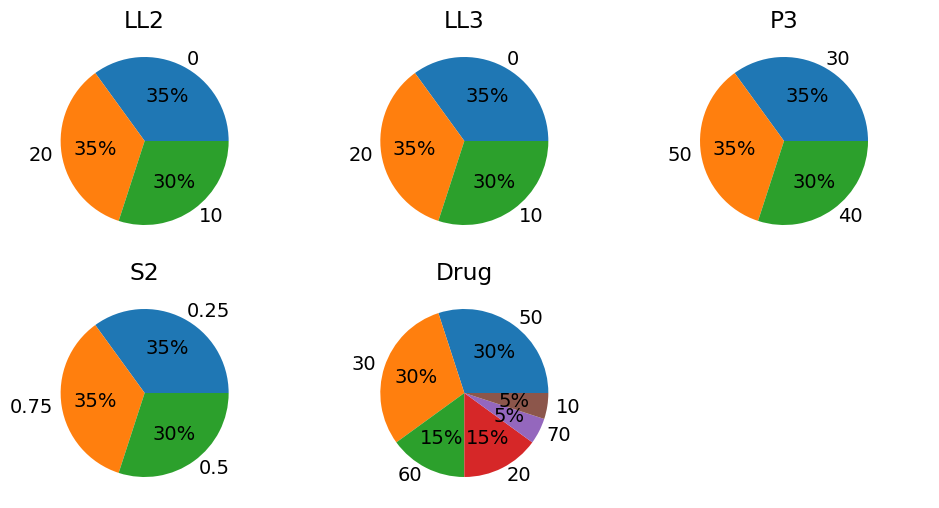

In [22]:
# plot the design

plt.rcParams.update({'font.size': 14})

n_columns = 3

n_rows = (len(doe.columns) + n_columns - 1) // n_columns 

fig, axes = plt.subplots(n_rows, n_columns, figsize=(12, 3 * n_rows))

plt.subplots_adjust(wspace=0.1)

if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, column in enumerate(doe.columns):
    data = doe[column].value_counts()
    labels = data.index
    
    axes[i].pie(data, labels=labels, autopct='%1.f%%')
    axes[i].set_title(f'{column}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

In [23]:
# convert the ratios to volumes

batch_mass = 6 #mg
batch_organic_volume = 0.3 #mL
batch_aqueous_volume = 2.7 #mL
organic_stock_concentration = 20 #mg/mL
organic_mix_volume = 0.4 #mL

def convert(ratio):

    organic_mass = batch_mass * ratio
    organic_mix_conc = organic_mass / batch_organic_volume
    organic_mix_mass = organic_mix_conc * organic_mix_volume
    organic_volume = organic_mix_mass / organic_stock_concentration

    return organic_volume * 1000

In [24]:
# calculate the volumes

new = pd.DataFrame()

for col in ['LL2', 'LL3', 'P3', 'Drug']:
    new[f'transfer_{col}'] = (doe[col]/100).apply(convert)

new['Total'] = new.sum(axis=1)
new = new * 3
new['S2'] = doe['S2']
new

,transfer_LL2,transfer_LL3,transfer_P3,transfer_Drug,Total,S2
0,0.0,0.0,360.0,840.0,1200.0,0.25
1,0.0,0.0,480.0,720.0,1200.0,0.50
2,0.0,0.0,600.0,600.0,1200.0,0.75
3,0.0,120.0,360.0,720.0,1200.0,0.50
4,0.0,120.0,480.0,600.0,1200.0,0.75
5,0.0,240.0,360.0,600.0,1200.0,0.75
6,0.0,240.0,600.0,360.0,1200.0,0.25
7,120.0,0.0,360.0,720.0,1200.0,0.50
8,120.0,0.0,480.0,600.0,1200.0,0.75
9,120.0,120.0,360.0,600.0,1200.0,0.75


In [ ]:
# save the data

doe.to_excel('DOE.xlsx', index=True)
new.to_excel('Transfer.xlsx', index=True)